In [1]:
from langgraph.graph import StateGraph, START , END
import random
from typing import TypedDict , List , Dict


/Users/int1946/Desktop/langraph_practice/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [ ]:
class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int


In [3]:
def greetNode(state:AgentState)->AgentState:
    state['name'] = f"hi {state['name']}"
    state["counter"] = 0
    return state

In [4]:
def randomNode(state: AgentState)->AgentState:
    num = random.randint(0 , 10)
    state['number'].append(num)
    state['counter'] += 1
    print(f"Found number {num}, counter is {state['counter']}")
    return state

In [5]:
def shouldContinue(state: AgentState)->AgentState:
    if state['counter'] < 5:
        print("looping back")
        return "loopEdge"
    else:
        print("exiting")
        return "exitEdge"

In [6]:
graph = StateGraph(AgentState)

graph.add_node("greeter" , greetNode)
graph.add_node("random" , randomNode)

graph.add_edge(START , "greeter")
graph.add_edge("greeter" , "random")
graph.add_conditional_edges(
    "random" , 
    shouldContinue,{
        "loopEdge":"random",
        "exitEdge":END
    }
)

app = graph.compile()

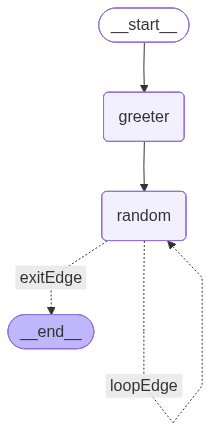

In [7]:
app

In [8]:
input_data = {
    "name":"DEBU",
    "number":[],
    "counter":0
}
result = app.invoke(input_data)


Found number 8, counter is 1
looping back
Found number 8, counter is 2
looping back
Found number 9, counter is 3
looping back
Found number 7, counter is 4
looping back
Found number 3, counter is 5
exiting


In [9]:
print(result)

{'name': 'hi DEBU', 'number': [8, 8, 9, 7, 3], 'counter': 5}
